## Health Insurance Lead Prediction

#### Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

#### Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

#### Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

#### Demographics (city, age, region etc.) Information regarding holding policies of the customer Recommended Policy Information Evaluation Metric Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [1]:
#Importing important packages 
import pandas as pd 
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import roc_auc_score



import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) # To avoid warning messages in the code run
    

In [2]:
train=pd.read_csv('train_Df64byy.csv')
test=pd.read_csv('test_YCcRUnU.csv')

In [3]:
print('shape of train',train.shape)
print ('shape of test',test.shape)

shape of train (50882, 14)
shape of test (21805, 13)


# Split data into train and validation so that we can analyse independent variables 

In [4]:
# train vaild split
train_data,valid_data = train_test_split(train, train_size=0.7 , stratify=train['Response'], random_state=100)

In [5]:
print('train_data shape-',train_data.shape)
print('valid_data shape-',valid_data.shape)

train_data shape- (35617, 14)
valid_data shape- (15265, 14)


In [6]:
train_data.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
47533,47534,C1,2383,Owned,Joint,51,16,No,X4,3.0,2.0,21,24717.0,0
36307,36308,C13,2833,Rented,Individual,23,23,No,X1,NaN,NaN,22,6300.0,1
3512,3513,C1,19,Owned,Individual,75,75,No,X4,NaN,NaN,17,17276.0,1
30053,30054,C11,433,Rented,Individual,31,31,No,X2,3.0,1.0,19,14040.0,0
39952,39953,C3,548,Owned,Individual,65,65,No,X1,3.0,2.0,12,19924.0,0
12834,12835,C20,1174,Owned,Individual,61,61,No,X3,14+,3.0,22,13354.0,0
8833,8834,C11,359,Rented,Individual,22,22,No,NaN,NaN,NaN,15,6030.0,1
16073,16074,C4,357,Owned,Individual,19,19,No,NaN,NaN,NaN,18,5184.0,0
36301,36302,C21,3768,Owned,Joint,55,46,No,X1,9.0,1.0,20,25818.0,1
37704,37705,C27,1520,Owned,Individual,43,43,No,X1,NaN,NaN,4,14388.0,0


<AxesSubplot:xlabel='Response', ylabel='count'>

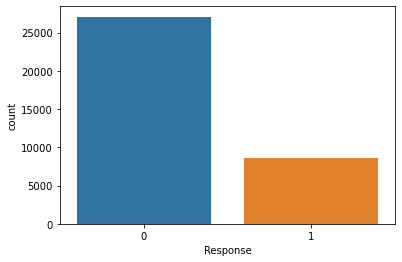

In [7]:
sns.countplot(x=train_data['Response'],data=train_data)
## on analysing the count of Y variable we have realised that O's are more and 1 are less in no. 

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

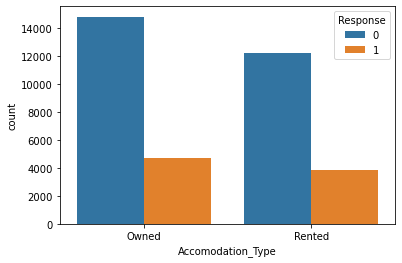

In [8]:
sns.countplot(x=train_data['Accomodation_Type'], hue=train_data['Response'],data=train_data)
## accomodation type is not impacting that much so we will drop this column 


<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

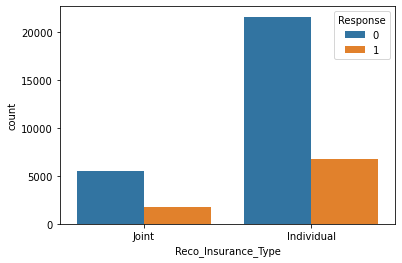

In [9]:
sns.countplot(x=train_data['Reco_Insurance_Type'], hue=train_data['Response'],data=train_data)
## targets are more for individual heath insurance 

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

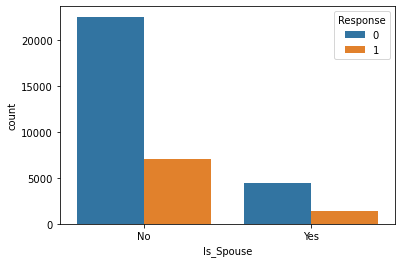

In [10]:
sns.countplot(x=train_data['Is_Spouse'], hue=train_data['Response'],data=train_data)
## In joint insurace policy, most of the second party who is taking insurance can be anyone in comparison to spouse

<AxesSubplot:xlabel='City_Code', ylabel='count'>

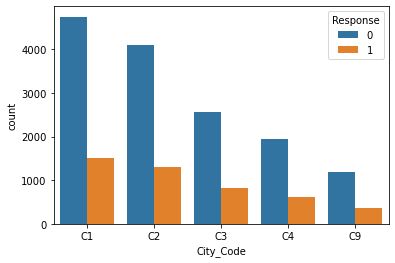

In [11]:
sns.countplot(x=train_data['City_Code'], hue=train_data['Response'],data=train_data,order=train_data['City_Code'].value_counts().iloc[:5].index)
# City with C1 is the main target market for company having highest leads over there 

In [12]:
train_data['Health Indicator'].value_counts()
# Mostly people in this data fall in X1 and X2 health indicators 

X1    9081
X2    7270
X3    4740
X4    4008
X5    1205
X6     891
X7     142
X8      55
X9      49
Name: Health Indicator, dtype: int64

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

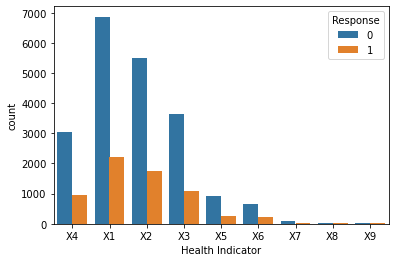

In [13]:
sns.countplot(x=train_data['Health Indicator'],hue=train_data['Response'],data=train_data)

## Analysis of quantitative variable 

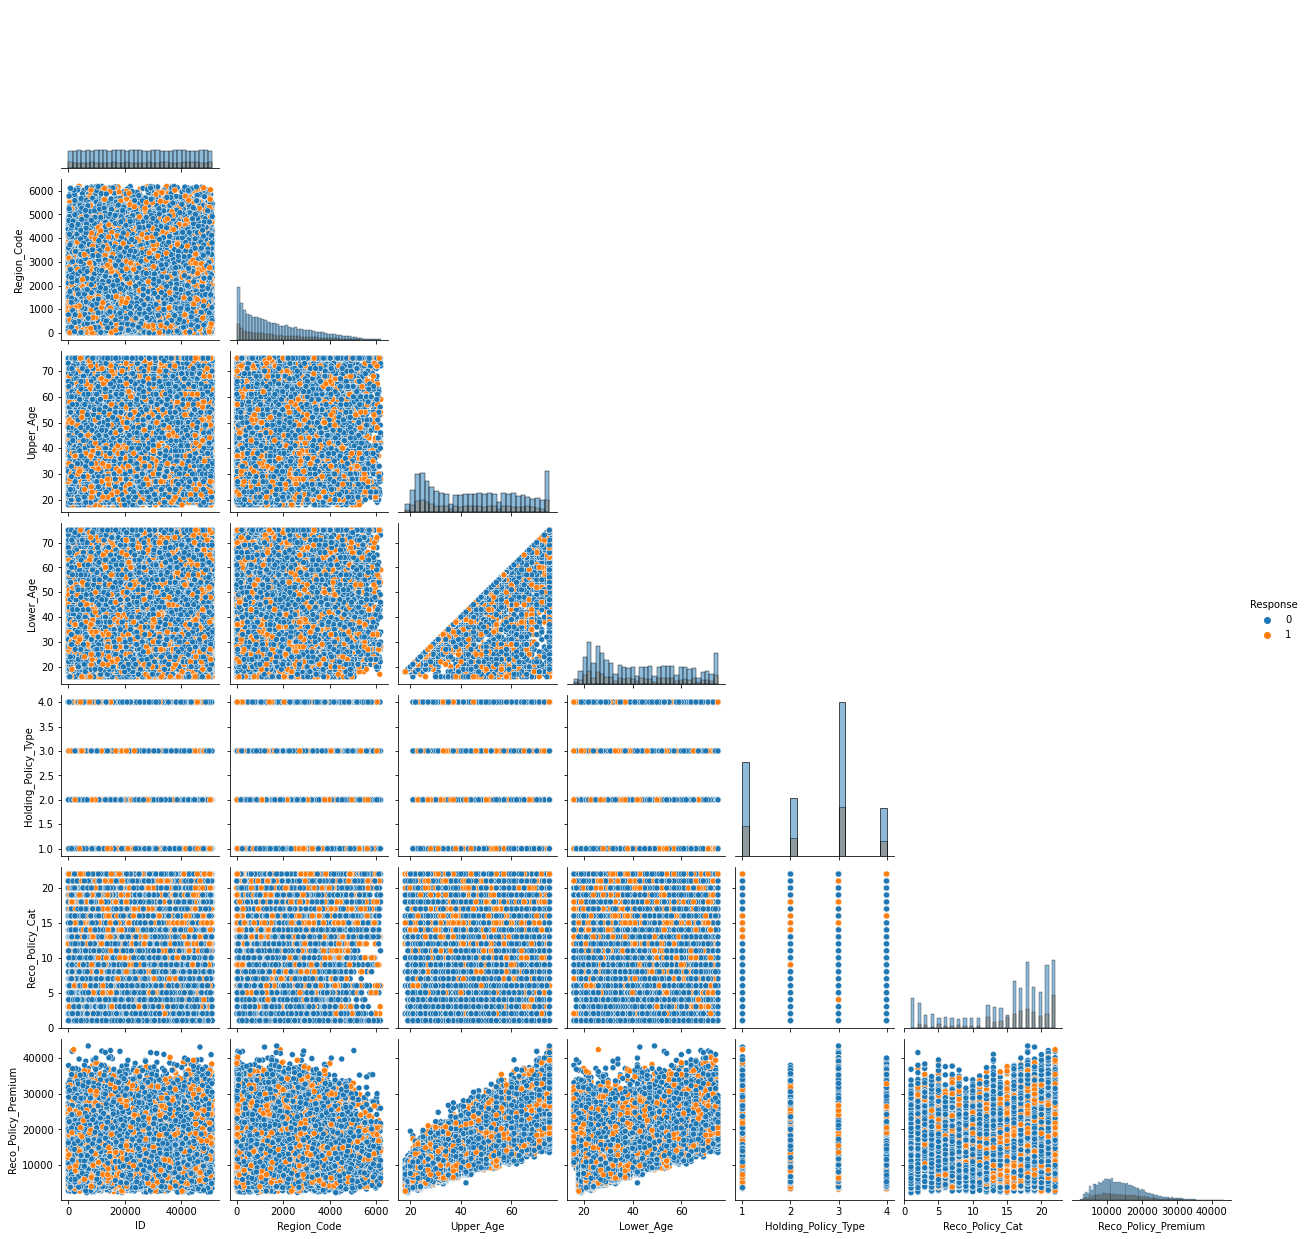

In [14]:
sns.pairplot(data=train_data,diag_kind='hist',corner='True',hue='Response')
## through pairplot we have found that upper age and lower age are related with recommended policy premium 

In [15]:
train_data['Response'].value_counts()

0    27071
1     8546
Name: Response, dtype: int64

In [16]:
train_data.describe(include='all')
## Two types of insurance recommended by company 1. individual and 2. joint , out of which mostly have taken 'individual insurance'. 
## Age is between 16-75 and 75% people are less than 60 
## people with X1 health indicator are taking more insurance 
## accomodation factor is not impacting that much




,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,35617.000000,35617,35617.000000,35617,35617,35617.000000,35617.00000,35617,27441,21425,21425.000000,35617.000000,35617.000000,35617.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,1.0,NaN,NaN,NaN,NaN
freq,NaN,6269,NaN,19538,28360,NaN,NaN,29697,9081,3113,NaN,NaN,NaN,NaN
mean,25476.951512,NaN,1721.494680,NaN,NaN,44.884690,42.76660,NaN,NaN,NaN,2.441307,15.126176,14195.991824,0.239942
std,14699.051664,NaN,1420.308572,NaN,NaN,17.351147,17.35203,NaN,NaN,NaN,1.024131,6.335008,6598.172705,0.427054
min,2.000000,NaN,1.000000,NaN,NaN,18.000000,16.00000,NaN,NaN,NaN,1.000000,1.000000,2280.000000,0.000000
25%,12729.000000,NaN,517.000000,NaN,NaN,28.000000,27.00000,NaN,NaN,NaN,1.000000,12.000000,9248.000000,0.000000
50%,25488.000000,NaN,1370.000000,NaN,NaN,44.000000,41.00000,NaN,NaN,NaN,3.000000,17.000000,13212.000000,0.000000
75%,38257.000000,NaN,2649.000000,NaN,NaN,60.000000,57.00000,NaN,NaN,NaN,3.000000,20.000000,18116.000000,0.000000


<AxesSubplot:xlabel='Upper_Age', ylabel='Reco_Policy_Premium'>

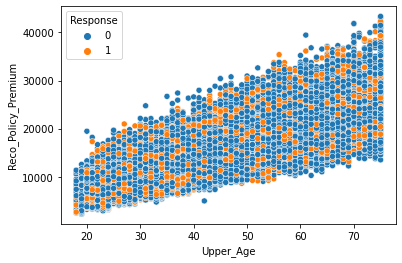

In [17]:
sns.scatterplot(hue='Response',y='Reco_Policy_Premium',x='Upper_Age',data=train_data)
## positive corelation between age and Rec policy premium. Higher the age, higher wil be the premium 

<AxesSubplot:xlabel='Response', ylabel='Upper_Age'>

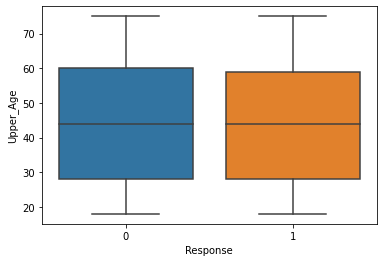

In [18]:
sns.boxplot(x='Response',y='Upper_Age',data=train_data)
## Mostly person buying insurance within age group 20-58. 60 plus are not giving very good reponse while company has offered insurance to beyond 70  

## Outliers in data set 

<AxesSubplot:>

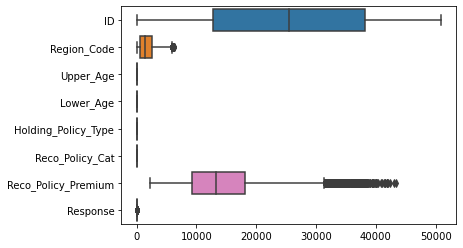

In [19]:
sns.boxplot(data=train_data,width=0.8,orient='h')
## recommended policy premium has outliers but it is not impacting that much to the response so we can ignore it 

## Missing Values Treatment

In [20]:
data_combined=train_data.append([valid_data,test],ignore_index=True)

In [21]:
data_combined.shape

(72687, 14)

In [22]:
data_combined.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
dtype: int64

## Removing null values from Holding_Policy_Duration and Holding_Policy_Type       

In [23]:
data_combined[data_combined['Holding_Policy_Duration'].isnull() & data_combined['Holding_Policy_Type'].isnull()]
## Null values in Holding policy duration and holding policy type are occuring simultaneously that means person doesnot hold any previous policy. So we will replace Nan by '-'

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
1,36308,C13,2833,Rented,Individual,23,23,No,X1,NaN,NaN,22,6300.0,1.0
2,3513,C1,19,Owned,Individual,75,75,No,X4,NaN,NaN,17,17276.0,1.0
6,8834,C11,359,Rented,Individual,22,22,No,NaN,NaN,NaN,15,6030.0,1.0
7,16074,C4,357,Owned,Individual,19,19,No,NaN,NaN,NaN,18,5184.0,0.0
9,37705,C27,1520,Owned,Individual,43,43,No,X1,NaN,NaN,4,14388.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72672,72673,C1,458,Owned,Individual,35,35,No,X5,NaN,NaN,17,11648.0,NaN
72673,72674,C6,1067,Rented,Individual,30,30,No,X4,NaN,NaN,17,11088.0,NaN
72675,72676,C7,685,Owned,Individual,26,26,No,X1,NaN,NaN,14,10026.0,NaN
72680,72681,C1,340,Owned,Individual,24,24,No,X1,NaN,NaN,19,6600.0,NaN


In [24]:
data_combined['Holding_Policy_Duration'].fillna('-',inplace=True)

In [25]:
data_combined['Holding_Policy_Type'].fillna('-',inplace=True)

In [26]:
data_combined.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
dtype: int64

In [27]:
## we will fill the missing values in health indicator on the basis its mode value 
data_combined['Health Indicator'].value_counts()

X1    18624
X2    14848
X3     9608
X4     8185
X5     2408
X6     1794
X7      292
X8      119
X9       91
Name: Health Indicator, dtype: int64

In [28]:
33 
data_combined['Health Indicator'].mode()

0    X1
dtype: object

In [29]:
data_combined['Health Indicator'].fillna('X1',inplace=True)

In [30]:
data_combined['Health Indicator'].isnull().sum()

0

In [31]:
data_combined.isnull().sum()
## Here response variable in test have null values becuse test data does not have response variable and on combining the data  we get extra variable in test 

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
dtype: int64

In [32]:
## separate the numerical data 

In [33]:
data_combined.shape

(72687, 14)

In [34]:
data_combined_num=data_combined.select_dtypes(include=[np.number])

In [35]:
data_combined_num.shape

(72687, 7)

In [36]:
data_combined_catg=data_combined.select_dtypes(include='object')

In [37]:
data_combined_catg

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type
0,C1,Owned,Joint,No,X4,3.0,2
1,C13,Rented,Individual,No,X1,-,-
2,C1,Owned,Individual,No,X4,-,-
3,C11,Rented,Individual,No,X2,3.0,1
4,C3,Owned,Individual,No,X1,3.0,2
...,...,...,...,...,...,...,...
72682,C3,Owned,Individual,No,X1,4.0,1
72683,C4,Owned,Individual,No,X5,6.0,3
72684,C12,Owned,Individual,No,X3,-,-
72685,C10,Rented,Individual,No,X4,3.0,1


In [38]:
data_combined_dum=pd.get_dummies(data_combined_catg)

In [39]:
data_combined_dum

,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,...,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_1.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_-
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72683,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
72684,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72685,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
train_combined=pd.concat([data_combined_num,data_combined_dum],axis=1)

In [41]:
train_combined

,ID,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C1,City_Code_C10,City_Code_C11,...,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_1.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_-
0,47534,2383,51,16,21,24717.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,36308,2833,23,23,22,6300.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3513,19,75,75,17,17276.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,30054,433,31,31,19,14040.0,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,39953,548,65,65,12,19924.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,72683,1044,45,45,18,15884.0,NaN,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72683,72684,266,59,59,18,21390.0,NaN,0,0,0,...,0,1,0,0,0,0,0,1,0,0
72684,72685,2470,74,74,1,17836.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72685,72686,1676,25,25,19,11568.0,NaN,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
train=train_combined.iloc[:35617,:]
valid=train_combined.iloc[35617:50882,:]
test=train_combined.iloc[50882:,:]

In [43]:
print('train size',train.shape)
print('valid size',valid.shape)
print('test size',test.shape)

train size (35617, 79)
valid size (15265, 79)
test size (21805, 79)


# No duplicate rows in data 

In [44]:
# No duplicate rows in data 
train_combined[train_combined.duplicated()]

,ID,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C1,City_Code_C10,City_Code_C11,...,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_1.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_-


In [45]:
train_target=train['Response'] 

In [46]:
train_target.shape

(35617,)

In [47]:

train_df=train.drop('Response',axis=1) 

In [48]:
train_df

,ID,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,...,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_1.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_-
0,47534,2383,51,16,21,24717.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,36308,2833,23,23,22,6300.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3513,19,75,75,17,17276.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,30054,433,31,31,19,14040.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,39953,548,65,65,12,19924.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35612,20773,2283,50,50,17,11592.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35613,32937,1707,24,24,22,3954.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35614,13908,2863,28,28,19,7280.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
35615,28522,998,21,21,19,10864.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
valid_target=valid['Response']

In [50]:
valid_df=valid.drop('Response',axis=1)

In [51]:
test_new=test.drop('Response',axis=1)

# Model - XG Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_parameters = { 'n_estimators': [100, 200, 300, 400, 500],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'max_depth': [1, 2, 3, 4, 5],
                    'min_samples_leaf': [1, 20, 30, 50]
                    }

In [ ]:
model = XGBClassifier(random_state=1)

In [ ]:
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=3,  # 3-Fold Cross Validation
                    verbose=3, #To print what it is doing
                    n_jobs=-1, #fastest possible depending in the laptop
                    scoring='roc_auc')

In [ ]:
gscv.fit(train_df, train_target)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 75.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 122.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 146.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 20, 30, 50],
 

In [ ]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 300}


In [ ]:
print(gscv.best_score_)
print(gscv.best_estimator_)
print(gscv.scorer_)

0.6436761541847542
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=1, missing=None,
              n_estimators=300, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
make_scorer(roc_auc_score, needs_threshold=True)


## On analysing various parameters on XG boost, ROC-AUC score on train and validation data is around 66. So we prepare a better model with better parameter

# Best Model 

In [52]:
from xgboost import XGBClassifier
model_parameters = { 'n_estimators': [300],
                    'learning_rate': [0.09],
                    'max_depth': [5],
                    'min_samples_leaf': [30]
                    }

In [53]:
model = XGBClassifier(random_state=1)

In [54]:
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=3,  # 3-Fold Cross Validation
                    verbose=3, #To print what it is doing
                    n_jobs=-1, #fastest possible depending in the laptop
                    scoring='roc_auc')

In [55]:
gscv.fit(train_df, train_target)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
C:\Users\Asmit\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [56]:
print('AUC on validation by gscv =', roc_auc_score(y_true=valid_target,
                                                        y_score=gscv.predict_proba(valid_df)[:, 1]))

AUC on validation by gscv = 0.6618369360568982


In [57]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.09, 'max_depth': 5, 'min_samples_leaf': 30, 'n_estimators': 300}


In [58]:
print('AUC on train by gscv =', roc_auc_score(y_true=train_target,
                                                        y_score=gscv.predict_proba(train_df)[:, 1]))

AUC on train by gscv = 0.8030316163432659


In [63]:
Y_test=gscv.predict(test_new)

In [65]:
test_new['Response']=gscv.predict(test_new)

In [66]:
df=test_new[['ID','Response']]

In [67]:
df

,ID,Response
50882,50883,0.0
50883,50884,0.0
50884,50885,0.0
50885,50886,0.0
50886,50887,0.0
...,...,...
72682,72683,0.0
72683,72684,0.0
72684,72685,0.0
72685,72686,0.0


In [69]:
df.to_excel(r'C:\Users\Asmit\Desktop\hh\sample solution - XG boost.xlsx', index = False, header=True)